In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import gc

In [89]:
df_sub=pd.read_csv("files/sample_submission.csv")
df_train=pd.read_csv("files/train.csv")
df_test=pd.read_csv("files/test.csv")

In [90]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [91]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [92]:
df_train.shape, df_test.shape

((188533, 13), (125690, 12))

In [93]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [95]:
df_train.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [96]:
df_train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/1680811554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='price', data=avg_price_by_brand, palette='viridis', errorbar=None)


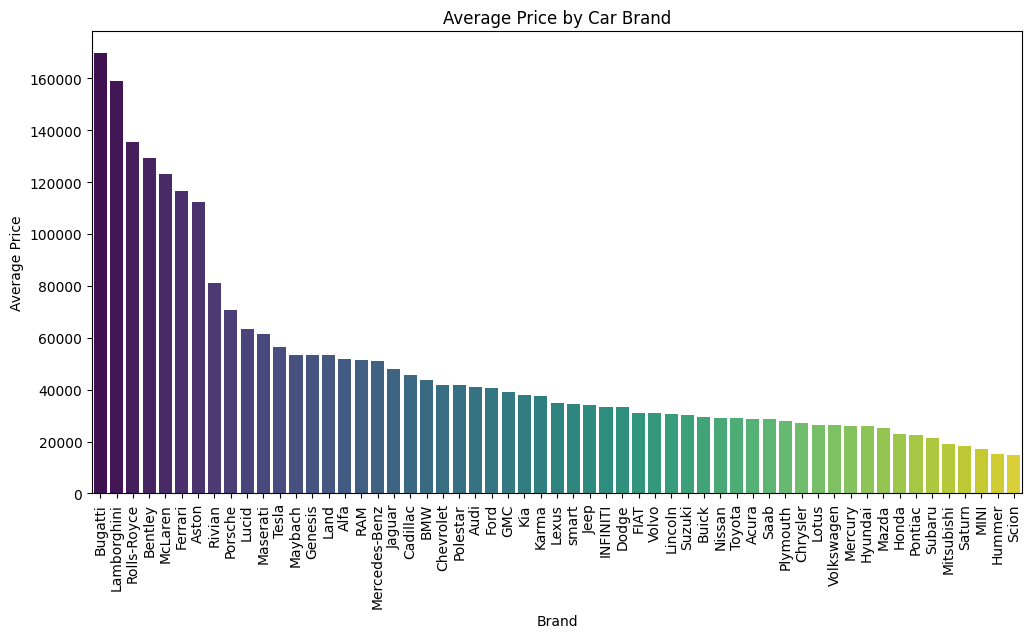

In [97]:
# Calcular el precio promedio por marca y convertir a DataFrame
avg_price_by_brand = df_train.groupby('brand')['price'].mean().reset_index()

# Ordenar de mayor a menor por precio
avg_price_by_brand = avg_price_by_brand.sort_values(by='price', ascending=False)

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras utilizando el DataFrame ordenado
sns.barplot(x='brand', y='price', data=avg_price_by_brand, palette='viridis', errorbar=None)

# Configurar título y etiquetas
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()


/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/1203538682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='price', data=df_train[:10000], palette='viridis', errorbar=None)


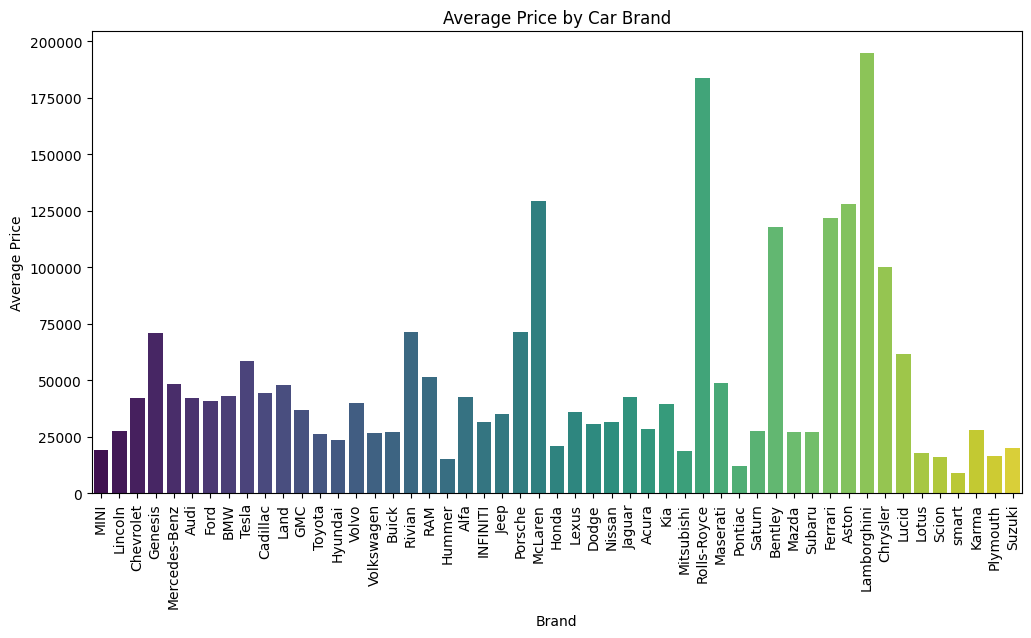

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df_train[:10000], palette='viridis', errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

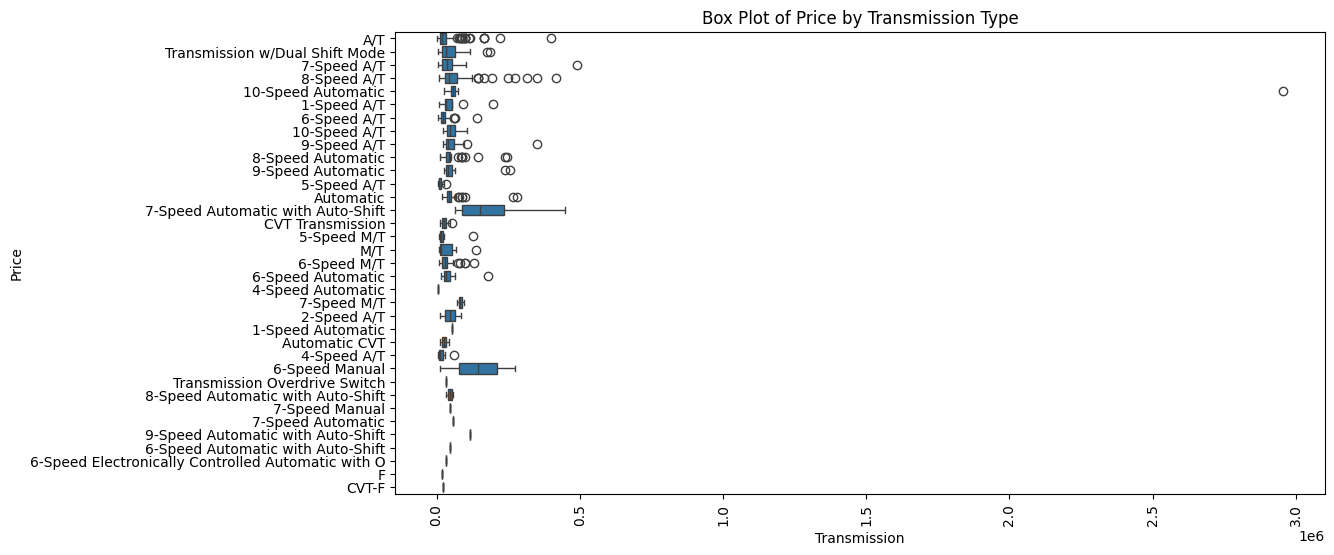

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='transmission', data=df_train[:1000],orient='h')
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=90) 
plt.show()

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/1544401746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accident', y='price', data=df_train, palette='viridis', errorbar=None)


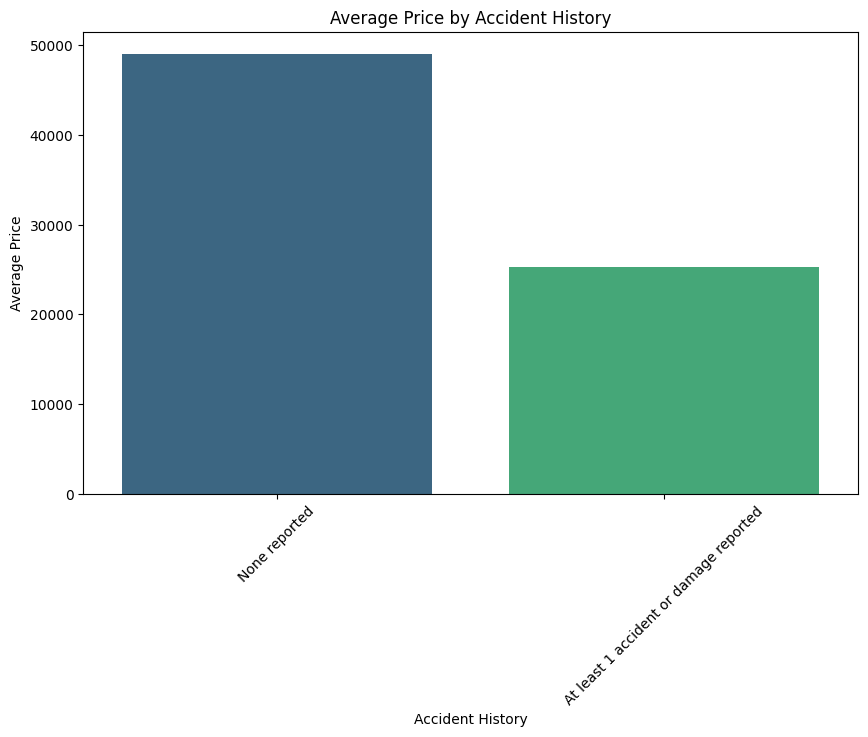

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_train, palette='viridis', errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/814162084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel_type', data=df_train, palette='viridis')


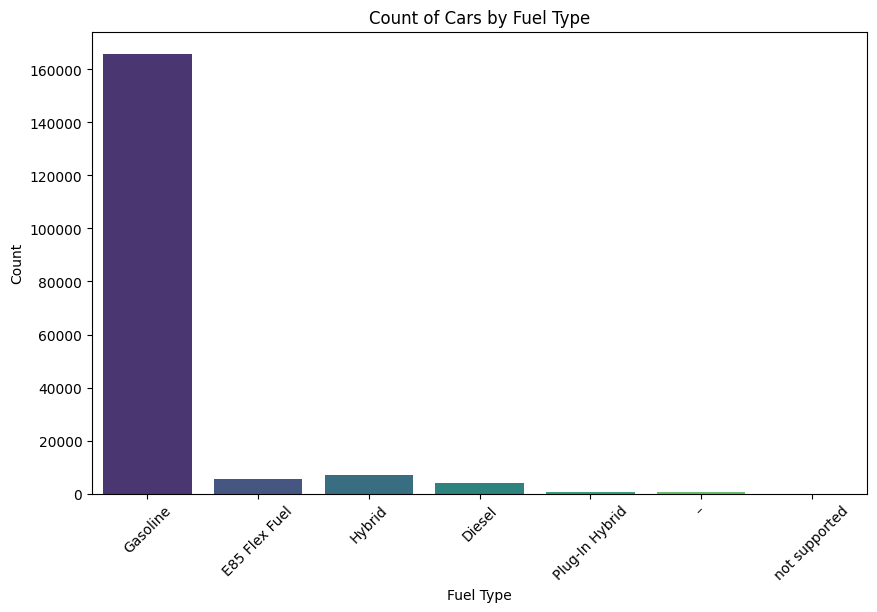

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df_train, palette='viridis')
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/3584826151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data=df_train, palette='plasma')


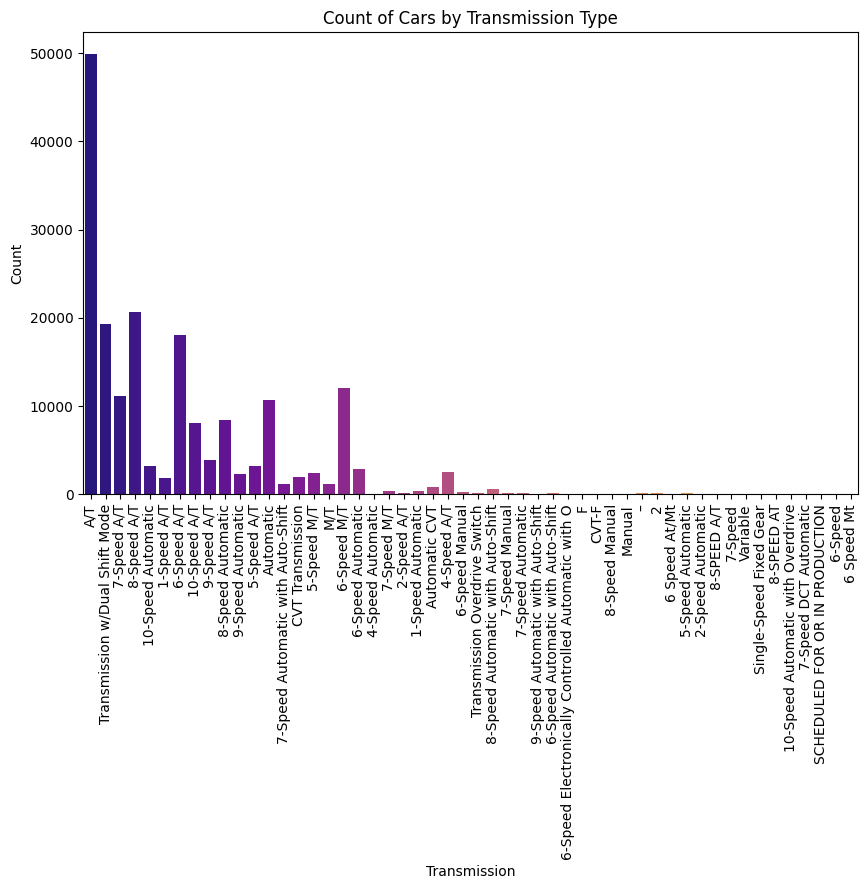

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df_train, palette='plasma')
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [103]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


133334

In [104]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

brand: 55 unique values
model: 1891 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 317 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


54202

In [105]:
missing_train = df_train.isna().mean() * 100
missing_test = df_test.isna().mean() * 100

print("Columns in df_train with more than 0% missing values:")
print(missing_train[missing_train > 0])

print("\nColumns in df_test with more than 0% missing values:")
print(missing_test[missing_test > 0])

Columns in df_train with more than 0% missing values:
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64

Columns in df_test with more than 0% missing values:
fuel_type       2.691543
accident        1.298433
clean_title    11.328666
dtype: float64


/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/3726948150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


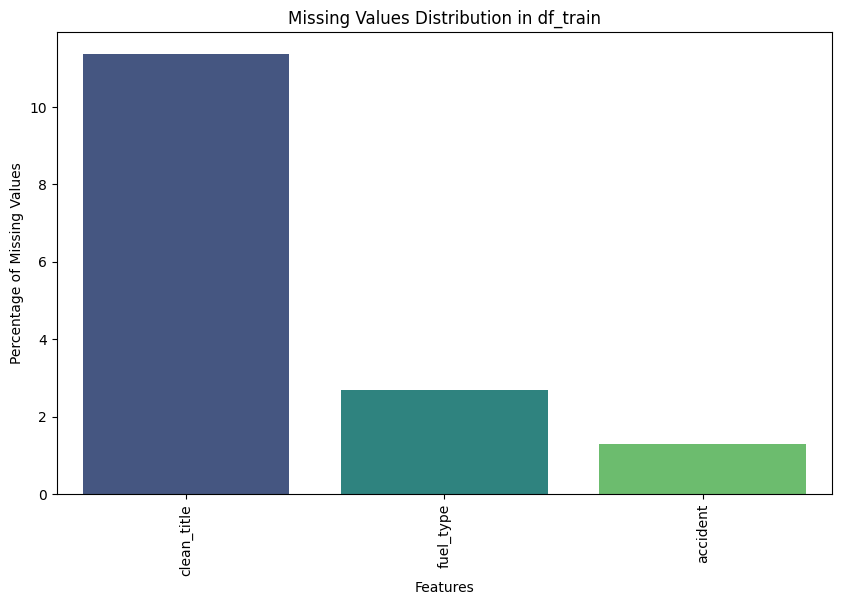

In [106]:
missing_values = df_train.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_train')
plt.show()

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import category_encoders as ce

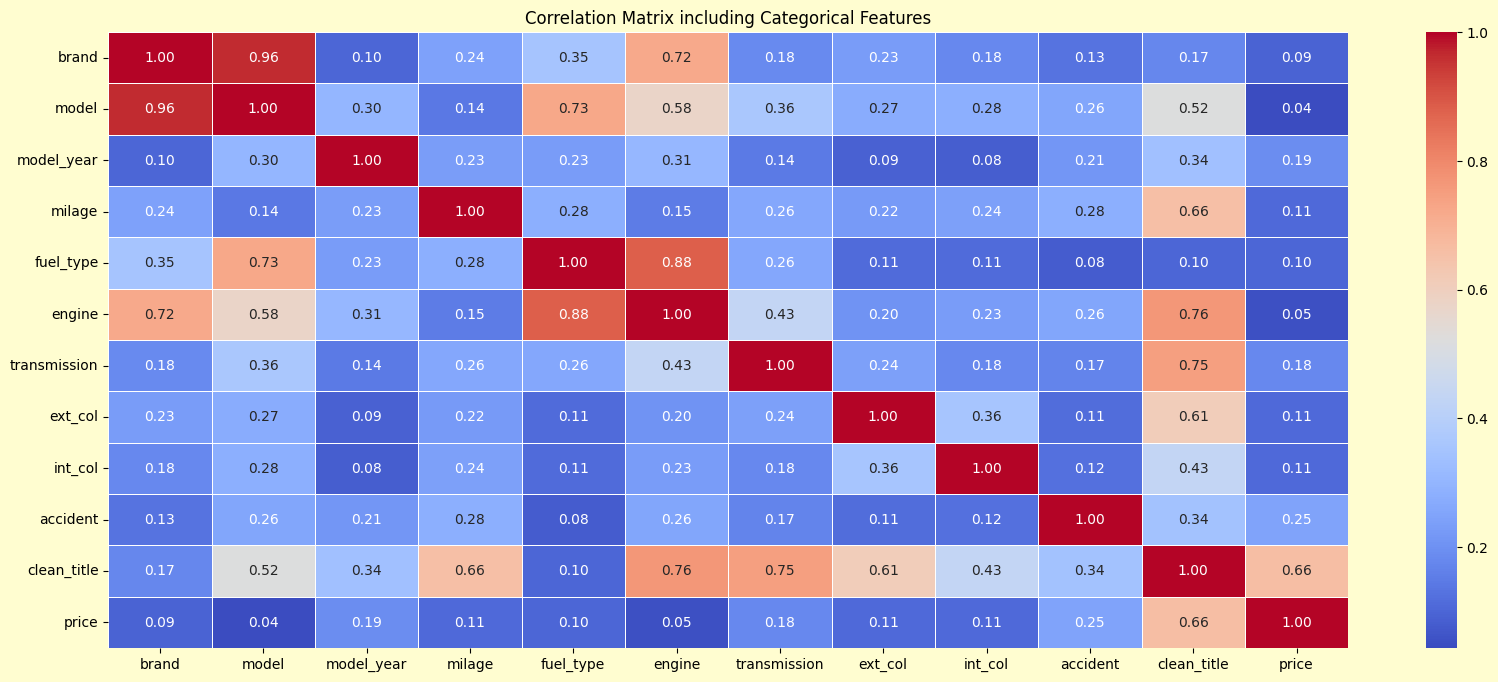

In [108]:
from dython.nominal import associations

associations_df = associations(df_train, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

# Problemas de Calidad de Datos Identificados:

## Valores Faltantes:
- **fuel_type**: 2.69% faltantes (4,040 entradas faltantes)
- **accident**: 1.28% faltantes (1,923 entradas faltantes)
- **clean_title**: 11.32% faltantes (16,981 entradas faltantes)

**Modificación Requerida**: Imputar valores faltantes usando la moda o un marcador constante como 'Desconocido' para columnas categóricas.

## Alta Cardinalidad:
Columnas como brand, transmission, ext_col e int_col tienen muchos valores únicos (categorías raras).

**Modificación Requerida**: Considerar agrupar categorías raras en una sola categoría "Otros" para reducir la cardinalidad. Para ext_col e int_col, que tienen alta cardinalidad, considerar usar codificación hash o técnicas de incrustación de texto.

## Valores Atípicos:
- **milage**: Contiene 1,413 valores atípicos con valores que exceden el límite superior (202,259.50) o inferiores al límite inferior (-82,624.50).
- **price**: Contiene 8,637 valores atípicos que exceden el límite superior (99,237.50) o inferiores al límite inferior (-32,342.50).

**Modificación Requerida**: Limitar o eliminar valores atípicos para mejorar la robustez del modelo. Se puede limitar al límite superior o usar filtrado basado en IQR.

## Tipos de Datos Mixtos:
Las columnas fuel_type y accident tienen tipos de datos mixtos (por ejemplo, objetos y flotantes).

**Sugerencias**: Convertir estas columnas a un solo tipo de dato consistente (por ejemplo, cadena) antes de la codificación.

## Columna de Baja Información:
**clean_title**: Identificada como una posible columna de baja información con alta ausencia de datos (11.32%).

**Modificación Requerida**: Es mejor eliminar esta columna antes del modelado ya que proporciona poca o ninguna información adicional.

## Posible Columna de Fecha-Hora:
**model_year** se reconoce como una posible columna de fecha-hora, que podría representar la edad del vehículo.

**Sugerencias**: Transformar model_year en una característica que represente la edad del vehículo calculando la diferencia con el año actual.

<img src="files/encoding-methods.png" alt="Description" style="width:70%;"/>


In [109]:
from sklearn.impute import KNNImputer

def knn_impute(df, n_neighbors=5):   
    df_encoded = df.copy() # Se crea una copia del DataFrame original para no modificar los datos originales.
    for col in df_encoded.select_dtypes(include='object').columns: # Este bloque convierte las columnas categóricas (tipo object) a códigos numéricos, lo cual es necesario para que el KNNImputer pueda trabajar con los datos. df_encoded.select_dtypes(include='object').columns: Selecciona todas las columnas de tipo categórico (de texto). astype('category').cat.codes: Convierte las categorías a números enteros, donde cada categoría recibe un código numérico distinto.
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns) # fit_transform(df_encoded): Aplica el KNN para imputar los valores faltantes en las columnas numéricas (incluyendo las que eran categóricas pero se codificaron). pd.DataFrame(...): Convierte el resultado a un DataFrame con las mismas columnas que el original.
    for col in df.select_dtypes(include='object').columns: # df.select_dtypes(include='object').columns: Se seleccionan nuevamente las columnas que originalmente eran categóricas.
        df_imputed[col] = df_imputed[col].round().astype(int).map( # round().astype(int): Redondea los valores numéricos resultantes de la imputación y los convierte a enteros. 
            dict(enumerate(df[col].astype('category').cat.categories))) # map(dict(enumerate(...))): Usa un diccionario para mapear los códigos numéricos de vuelta a sus categorías originales.
    return df_imputed # La función devuelve un DataFrame df_imputed que contiene las columnas originales, pero con los valores faltantes imputados usando KNN.

In [110]:
df_train_imputed = knn_impute(df_train, n_neighbors=25)
df_test_imputed = knn_impute(df_test, n_neighbors=25)

In [111]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols_train = df_train_imputed.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(df_train_imputed[cat_cols_train].astype(str))
df_test_imputed[cat_cols_train] = ordinal_encoder.transform(df_test_imputed[cat_cols_train].astype(str))

In [112]:
df_train_imputed.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,31.0,495.0,2007.0,213000.0,2.0,116.0,38.0,312.0,71.0,1.0,0.0,4200.0
1,28.0,930.0,2002.0,143250.0,2.0,366.0,38.0,263.0,10.0,0.0,0.0,4999.0
2,9.0,1575.0,2002.0,136731.0,1.0,640.0,38.0,38.0,71.0,1.0,0.0,13900.0
3,16.0,758.0,2017.0,19500.0,2.0,863.0,49.0,29.0,14.0,1.0,0.0,45000.0
4,36.0,1077.0,2021.0,7388.0,2.0,259.0,23.0,29.0,10.0,1.0,0.0,97500.0


In [113]:
df_test_imputed.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,26.0,1390.0,2015.0,98000.0,2.0,325.0,16.0,304.0,10.0,1.0,0.0
1,26.0,1377.0,2020.0,9142.0,3.0,787.0,31.0,263.0,14.0,1.0,0.0
2,14.0,636.0,2022.0,28121.0,2.0,540.0,3.0,304.0,57.0,1.0,1.0
3,3.0,182.0,2016.0,61258.0,2.0,192.0,39.0,261.0,14.0,1.0,1.0
4,3.0,181.0,2018.0,59000.0,2.0,364.0,38.0,128.0,14.0,1.0,0.0


In [114]:
df_train = df_train_imputed
df_test = df_test_imputed

In [115]:
#df_train.drop(columns=['brand','clean_title'], inplace=True)  
#df_test.drop(columns=['brand','clean_title'], inplace=True)  
#df_train = pd.get_dummies(df_train, columns=['engine'], drop_first=True)
#df_test = pd.get_dummies(df_test, columns=['engine'], drop_first=True)
#df_train['milage_per_year'] = df_train['milage'] / (2024 - df_train['model_year'])
#df_test['milage_per_year'] = df_test['milage'] / (2024 - df_test['model_year'])
#df_train['car_age'] = 2024 - df_train['model_year']
#df_test['car_age'] = 2024 - df_test['model_year']
df_train['engine_transmission'] = df_train['engine'] * df_train['transmission']
df_test['engine_transmission'] = df_test['engine'] * df_test['transmission']

In [116]:
df_train.isnull().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
engine_transmission    0
dtype: int64

In [117]:
current_year = 2024
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Tesla']


def create_features(df):
    #df['vehicle_age'] = current_year - df['model_year']  
    #df['vehicle_age_int'] = df['vehicle_age'].astype(int)
    #df['mileage_per_year'] = df['milage'] / df['vehicle_age']
    #df['mileage_per_year'].replace([np.inf, -np.inf], 0, inplace=True)   
    df['rare_fuel_type'] = df['fuel_type'].apply(lambda x: 0 if x in ['Petrol', 'Diesel'] else 1)
    df['is_automatic'] = df['transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)
    df['has_accident_history'] = df['accident'].apply(lambda x: 1 if x != 'Unknown' and x != 'None' else 0)
    #df['engine_power_category'] = pd.qcut(df['engine'], q=3, labels=['Low', 'Medium', 'High'])
    df['color_match'] = df.apply(lambda row: 1 if row['ext_col'] == row['int_col'] else 0, axis=1)
    df['is_luxury_brand'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
    return df
#df_train = create_features(df_train)
#df_test = create_features(df_test)

In [118]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_transmission
0,31.0,495.0,2007.0,213000.0,2.0,116.0,38.0,312.0,71.0,1.0,0.0,4200.0,4408.0
1,28.0,930.0,2002.0,143250.0,2.0,366.0,38.0,263.0,10.0,0.0,0.0,4999.0,13908.0
2,9.0,1575.0,2002.0,136731.0,1.0,640.0,38.0,38.0,71.0,1.0,0.0,13900.0,24320.0
3,16.0,758.0,2017.0,19500.0,2.0,863.0,49.0,29.0,14.0,1.0,0.0,45000.0,42287.0
4,36.0,1077.0,2021.0,7388.0,2.0,259.0,23.0,29.0,10.0,1.0,0.0,97500.0,5957.0


In [119]:
df_test.shape,df_train.shape

((125690, 12), (188533, 13))

In [120]:
def remove_outliers_iqr(df, column):   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

df_train_no_outliers = remove_outliers_iqr(df_train, 'milage')
df_train_no_outliers = remove_outliers_iqr(df_train_no_outliers, 'price')
df_train_no_outliers.reset_index(drop=True, inplace=True)

In [121]:
df_train

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_transmission
0,31.0,495.0,2007.0,213000.0,2.0,116.0,38.0,312.0,71.0,1.0,0.0,4200.0,4408.0
1,28.0,930.0,2002.0,143250.0,2.0,366.0,38.0,263.0,10.0,0.0,0.0,4999.0,13908.0
2,9.0,1575.0,2002.0,136731.0,1.0,640.0,38.0,38.0,71.0,1.0,0.0,13900.0,24320.0
3,16.0,758.0,2017.0,19500.0,2.0,863.0,49.0,29.0,14.0,1.0,0.0,45000.0,42287.0
4,36.0,1077.0,2021.0,7388.0,2.0,259.0,23.0,29.0,10.0,1.0,0.0,97500.0,5957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8.0,604.0,2017.0,49000.0,2.0,866.0,49.0,304.0,10.0,1.0,0.0,27500.0,42434.0
188529,36.0,206.0,2018.0,28600.0,2.0,770.0,31.0,304.0,14.0,0.0,0.0,30000.0,23870.0
188530,36.0,223.0,2021.0,13650.0,2.0,921.0,23.0,304.0,14.0,1.0,0.0,86900.0,21183.0
188531,3.0,1471.0,2022.0,13895.0,2.0,512.0,1.0,82.0,14.0,1.0,1.0,84900.0,512.0


In [122]:
df_train_no_outliers.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_transmission
0,28.0,930.0,2002.0,143250.0,2.0,366.0,38.0,263.0,10.0,0.0,0.0,4999.0,13908.0
1,9.0,1575.0,2002.0,136731.0,1.0,640.0,38.0,38.0,71.0,1.0,0.0,13900.0,24320.0
2,16.0,758.0,2017.0,19500.0,2.0,863.0,49.0,29.0,14.0,1.0,0.0,45000.0,42287.0
3,36.0,1077.0,2021.0,7388.0,2.0,259.0,23.0,29.0,10.0,1.0,0.0,97500.0,5957.0
4,3.0,182.0,2018.0,40950.0,2.0,364.0,38.0,304.0,155.0,1.0,0.0,29950.0,13832.0


In [123]:
df_train_no_outliers.isnull().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
engine_transmission    0
dtype: int64

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/103966111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='price', data=df_train_no_outliers, palette='viridis')


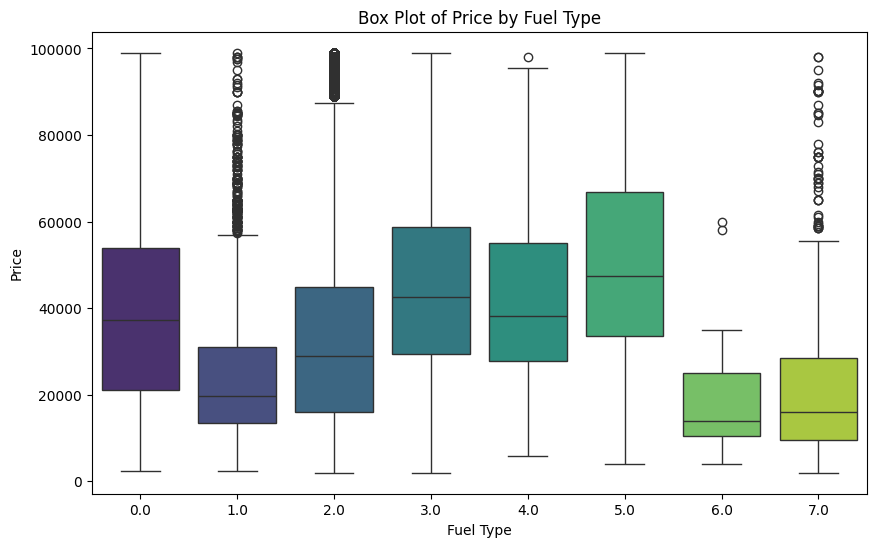

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=df_train_no_outliers, palette='viridis')
plt.title('Box Plot of Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/2748665229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_year', y='price', data=df_train_no_outliers, errorbar=None, palette='viridis')


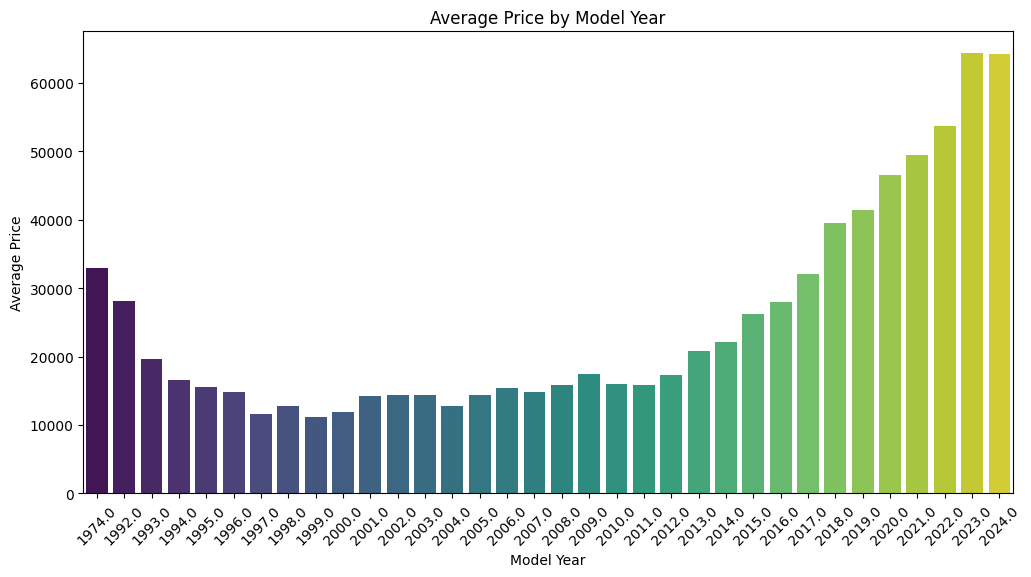

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='price', data=df_train_no_outliers, errorbar=None, palette='viridis')
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

<Figure size 600x300 with 0 Axes>

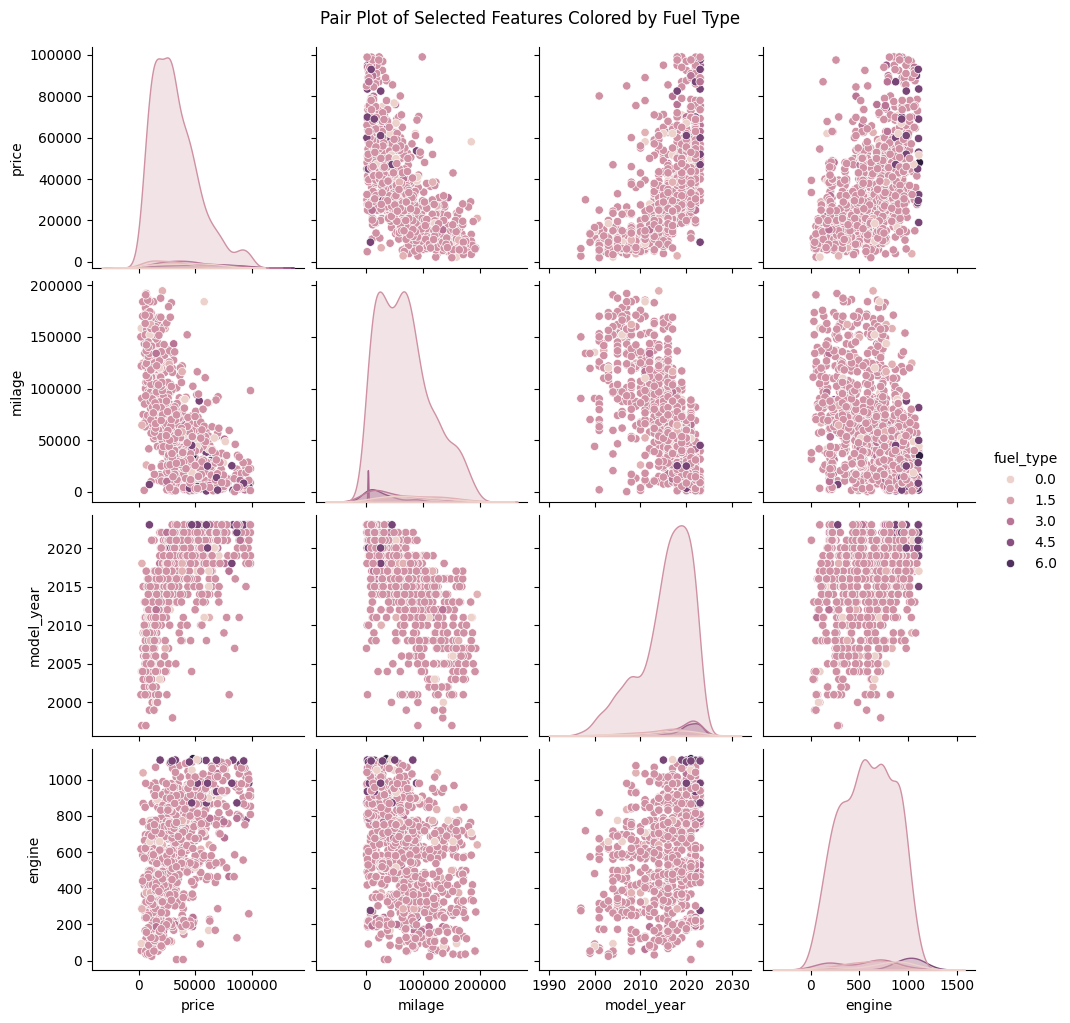

In [126]:
x = df_train_no_outliers[:1000]
plt.figure(figsize=(6, 3))
sns.pairplot(x[['price', 'milage', 'model_year', 'engine', 'fuel_type']], hue='fuel_type')
plt.suptitle('Pair Plot of Selected Features Colored by Fuel Type', y=1.02)
plt.show()

## Análisis de las gráficas:


- Diagonal principal: Muestra la distribución de cada variable.

Price: Distribución sesgada hacia la derecha, la mayoría de los vehículos tienen precios bajos a medios.
Milage: También sesgada a la derecha, muchos vehículos con bajo kilometraje.
Model_year: Distribución bimodal, sugiriendo dos grupos principales de años de modelo.
Engine: Distribución multimodal, indicando varios tamaños de motor comunes.


- Price vs otras variables:

Price vs Milage: Relación negativa, los vehículos con más kilometraje tienden a ser más baratos.
Price vs Model_year: Relación positiva, los modelos más nuevos tienden a ser más caros.
Price vs Engine: Relación positiva débil, motores más grandes tienden a ser algo más caros.


- Milage vs otras variables:

Milage vs Model_year: Relación negativa, los modelos más nuevos tienden a tener menos kilometraje.
Milage vs Engine: No hay una relación clara.


- Model_year vs Engine: No se observa una relación fuerte.

- Fuel_type (colores):

Los tipos de combustible parecen distribuirse de manera bastante uniforme en la mayoría de las variables.
Hay algunas concentraciones de ciertos tipos de combustible en rangos específicos de tamaño de motor.



**Observaciones generales**:

1. Los precios de los vehículos están influenciados principalmente por el año del modelo y el kilometraje.

2. No hay una clara segregación por tipo de combustible en la mayoría de las variables, lo que sugiere que el tipo de combustible no es un factor determinante único para estas características.

3. El tamaño del motor parece tener una relación débil con el precio, pero no muestra relaciones fuertes con otras variables.

4. Los modelos más recientes tienden a ser más caros y tener menos kilometraje, lo cual es lógico.

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_25465/2285521586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transmission', y='price', data=df_train_no_outliers, palette='viridis', errorbar=None)


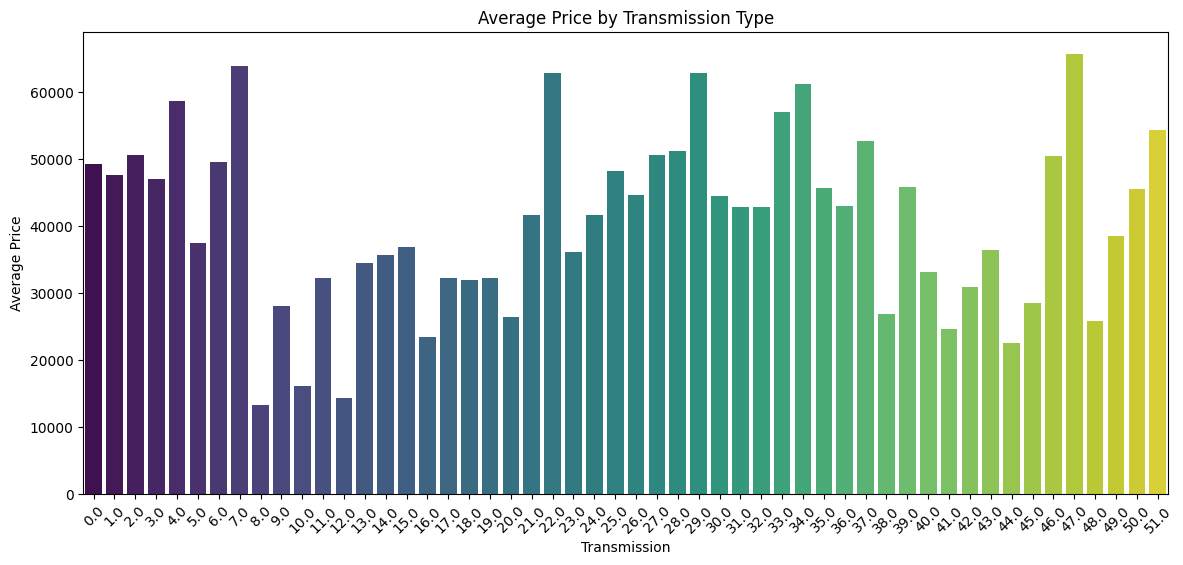

In [127]:
plt.figure(figsize=(14, 6))
sns.barplot(x='transmission', y='price', data=df_train_no_outliers, palette='viridis', errorbar=None)
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [128]:
y = df_train['price'] 
X = df_train.drop(['price'],axis=1)

# Modelos

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X)
scaled_test_data = scaler.transform(df_test)

In [130]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

lgb_params={
                'num_leaves': 426,
                 'max_depth': 20,
                 'learning_rate': 0.011353178352988012,
                 'n_estimators': 10000,
                 'metric': 'rmse',
                 'subsample': 0.5772552201954328,
                 'colsample_bytree': 0.9164865430101521,
                 'reg_alpha': 1.48699088003429e-06,
                 'reg_lambda': 0.41539458543414265,
                 'min_data_in_leaf': 73,
                 'feature_fraction': 0.751673655170548,
                 'bagging_fraction': 0.5120415391590843,
                 'bagging_freq': 2,
                 'random_state': 42,
                 'min_child_weight': 0.017236362383443497,
                 'cat_smooth': 54.81317407769262,
                 'verbose' : -1,
                 'early_stopping_rounds': 200,
}


lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))


for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    X_train, X_val = scaled_train_data[train_idx], scaled_train_data[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    lgbm_model = LGBMRegressor(**lgb_params)

    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='rmse',
                   #early_stopping_rounds=10,
                   #verbose=False                
                  )

    
    lgbm_fold_preds = lgbm_model.predict(X_val)
    lgbm_fold_test_preds = lgbm_model.predict(scaled_test_data)

    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits 
    fold_rmse = np.sqrt(mean_squared_error(y_val, lgbm_fold_preds))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")

overall_rmse_lgbm = np.sqrt(mean_squared_error(lgbm_true_labels, lgbm_predictions))
print(f"Overall RMSE (LGBMRegressor): {overall_rmse_lgbm:.4f}")

Training fold 1/5...
Fold 1 RMSE: 67833.6216
Training fold 2/5...
Fold 2 RMSE: 68598.3976
Training fold 3/5...
Fold 3 RMSE: 73965.5287
Training fold 4/5...
Fold 4 RMSE: 76405.3860
Training fold 5/5...
Fold 5 RMSE: 76320.5841
Overall RMSE (LGBMRegressor): 72719.4961


In [131]:
xgb_params={
     'lambda': 0.03880258557285165,
     'alpha': 0.02129832295514386,
     'colsample_bytree': 0.4,
     'subsample': 0.7,
     'learning_rate': 0.014,
     'max_depth': 17,
     'random_state': 2020,
     'min_child_weight': 85,
     'n_estimators': 10000,
     'early_stopping_rounds': 200,
#      'tree_method': 'gpu_hist'
    
}

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_predictions = np.zeros(len(scaled_train_data))
xgb_true_labels = np.zeros(len(scaled_train_data))
xgb_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    X_train, X_val = scaled_train_data[train_idx], scaled_train_data[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Iniciar el modelo con los parámetros correctos
    xgb_model = XGBRegressor(**xgb_params)
    
    # Entrenar el modelo
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        # 'eval_metric' ya está en los parámetros, no es necesario aquí
        verbose=False
    )

    # Predicciones
    xgb_fold_preds = xgb_model.predict(X_val)
    xgb_fold_test_preds = xgb_model.predict(scaled_test_data)
    
    xgb_predictions[val_idx] = xgb_fold_preds
    xgb_true_labels[val_idx] = y_val
    xgb_test_predictions += xgb_fold_test_preds / n_splits  

    # Calcular el RMSE para cada fold
    fold_rmse = np.sqrt(mean_squared_error(y_val, xgb_fold_preds))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")

# Calcular el RMSE total
overall_rmse_xgb = np.sqrt(mean_squared_error(xgb_true_labels, xgb_predictions))
print(f"Overall RMSE (XGBRegressor): {overall_rmse_xgb:.4f}")

Training fold 1/5...
Fold 1 RMSE: 67749.1629
Training fold 2/5...
Fold 2 RMSE: 68569.7535
Training fold 3/5...
Fold 3 RMSE: 73947.3465
Training fold 4/5...
Fold 4 RMSE: 76403.2301
Training fold 5/5...
Fold 5 RMSE: 76217.8974
Overall RMSE (XGBRegressor): 72672.6399


In [132]:
xgb_test_predictions

array([17162.16601562, 81269.76171875, 62032.43066406, ...,
       21654.31591797, 18882.31201172, 36272.43212891])

In [133]:
lgbm_test_predictions

array([17096.46004692, 80834.98760919, 61056.46261107, ...,
       22286.39620491, 16389.54257449, 35350.01527753])

In [135]:
df_sub['price']= lgbm_test_predictions*0.35+xgb_test_predictions*0.65

# Entrega final

In [ ]:
df_sub.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')